In [1]:
import sys
from itertools import repeat
import data, data.gene_datasets
import sklearn, sklearn.model_selection, sklearn.metrics, sklearn.linear_model, sklearn.neural_network, sklearn.tree
import numpy as np
import matplotlib, matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import gene_inference, gene_inference.utils
from gene_inference.models import lr, mlp, decision_tree
from gene_inference.infer_genes import infer_gene, infer_all_genes, sample_neighbors
from data.graph import Graph

/Users/martinweiss/.pyenv/versions/2.7.13/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
tcgatissue = data.gene_datasets.TCGATissue(data_dir='./genomics/TCGA/', data_file='TCGA_tissue_ppi.hdf5')
class Object(object):
    pass

opt = Object()
opt.seed = 0
opt.nb_class = None
opt.nb_examples = None
opt.nb_nodes = None
opt.graph = "pathway"
opt.dataset = tcgatissue

graph = Graph()
path = "./genomics/graph/pancan-tissue-graph.hdf5"
graph.load_graph(path)
#graph.intersection_with(tcgatissue)
g = nx.from_numpy_matrix(graph.adj)
mapping = dict(zip(range(0, len(tcgatissue.df.columns)), tcgatissue.df.columns))
g = nx.relabel_nodes(g, mapping)

Converting one-hot labels to integers


In [29]:
def predict_gene_from_samples(gene, max_train_size):
    full_results = pd.DataFrame([])
    first_degree_results = pd.DataFrame([])
    first_degree = set(g.neighbors(gene))
    first_degree.add(gene)
    first_degree_graph = g.subgraph(first_degree)

    for train_size in range(10, max_train_size, 10):
        print train_size
        full_result = infer_gene(lr, tcgatissue.df, gene, train_size, test_size=1000, trials=10, penalty=False)
        full_results = full_results.append(full_result).reset_index(drop=True)
        full_results.loc[full_results.index[-1], 'samples'] = train_size
        
        first_degree_result = infer_gene(lr, tcgatissue.df.loc[:, first_degree], gene, train_size, test_size=1000, trials=10, penalty=False)
        first_degree_results = first_degree_results.append(first_degree_result).reset_index(drop=True)
        first_degree_results.loc[first_degree_results.index[-1], 'samples'] = train_size
    return full_results, first_degree_results, gene


In [30]:
full_results_1, first_degree_results_1, gene1 = predict_gene_from_samples("RPL5", 1000)
#full_results_2, first_degree_results_2, gene2 = predict_gene_from_samples("S100A8",1000)
#full_results_3, first_degree_results_3, gene3 = predict_gene_from_samples("RPS10", 1000)
#full_results_4, first_degree_results_4, gene4 = predict_gene_from_samples("ERBB2", 1000)


10
20
30
40
50
60
70
80
90
100
110


KeyboardInterrupt: 

In [34]:
# results of adding Samples
def plot_genes_with_samples(full_results, first_degree_results, gene):
    plt.figure()

    line1 = plt.errorbar(full_results.index, full_results['auc'], xerr=0, yerr=full_results['std'])
    line2 = plt.errorbar(first_degree_results.index, first_degree_results['auc'], xerr=0, yerr=first_degree_results['std'])

    width = 0.2
    plt.xticks(list(full_results.iloc[::5, :].index), full_results.iloc[::5, :]['samples'], rotation=70)
    plt.title("Gene Inference on "+ gene + "with varying numbers of Samples")
    plt.ylabel("AUC")
    plt.xlabel("Number of Samples")
    plt.legend((line1[0], line2[0]), ('full', 'first_degree'), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)

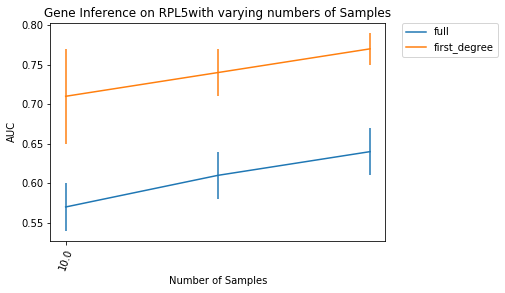

In [35]:
plot_genes_with_samples(full_results_1, first_degree_results_1, "RPL5")
#plot_genes_with_samples(full_results_2, first_degree_results_2, "S100A8")
#plot_genes_with_samples(full_results_3, first_degree_results_3, "RPS10")
#plot_genes_with_samples(full_results_4, first_degree_results_4, "ERBB2")


In [45]:
# Predict a gene from a growing number of Nodes
results = pd.DataFrame([])
gene = "RPL5"

for num_genes in range(2, 100, 1):
    print num_genes
    df = tcgatissue.df.loc[:, sample_neighbors(g, "RPL5", num_genes)]
    result = infer_gene(lr, df, "RPL5", train_size=100, test_size=500, trials=20, penalty=False)
    results = results.append(result).reset_index(drop=True)
    results.loc[results.index[-1], 'nodes'] = num_genes
results

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


,auc,gene_name,nodes,std
0,0.77,RPL5,2.0,0.02
1,0.75,RPL5,3.0,0.01
2,0.75,RPL5,4.0,0.01
3,0.75,RPL5,5.0,0.02
4,0.75,RPL5,6.0,0.02
5,0.75,RPL5,7.0,0.02
6,0.75,RPL5,8.0,0.02
7,0.75,RPL5,9.0,0.02
8,0.75,RPL5,10.0,0.02
9,0.75,RPL5,11.0,0.02


In [43]:
results

,auc,gene_name,nodes,std
0,0.77,RPL5,2.0,0.02
1,0.76,RPL5,4.0,0.02
2,0.76,RPL5,6.0,0.02
3,0.76,RPL5,8.0,0.02
4,0.75,RPL5,10.0,0.02
5,0.75,RPL5,12.0,0.02
6,0.77,RPL5,14.0,0.02
7,0.77,RPL5,16.0,0.02
8,0.77,RPL5,18.0,0.02
9,0.76,RPL5,20.0,0.02


NameError: name 'full_results' is not defined

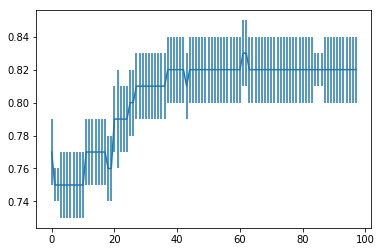

In [46]:
# results of adding Nodes
plt.figure()

#full_results.loc[full_results['samples'] == 100]

line1 = plt.errorbar(results.index, results['auc'], xerr=0, yerr=results['std'])
line2 = plt.errorbar(full_results.index, list(repeat(0.69, len(full_results))), xerr=0, yerr=list(repeat(0.06, len(full_results))))

width = 0.2
plt.xticks(list(results.iloc[::5, :].index), results.iloc[::5, :]['nodes'], rotation=70)
plt.title("Gene Inference with varying numbers of nodes")
plt.ylabel("AUC")
plt.xlabel("number of nodes")
plt.legend((line1[0], line2[0]), ('Varying # of Nodes', "Baseline (Full Dataset)"), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)